In [1]:
from sklearn.metrics import silhouette_score, root_mean_squared_error, r2_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from hirarchy import build_tree, get_level_data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chisquare, pearsonr
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import rcParams
from tqdm import tqdm
import seaborn as sns
import pickle as pkl
import pandas as pd
import numpy as np
import warnings
import sys
import os

In [2]:
rcParams['font.family'] = 'DejaVu Sans'
warnings.filterwarnings('ignore')
sys.path.append('./')
os.makedirs('./submission/concatenated/test/data', exist_ok=True)

# Dragon

In [3]:
# Dragon
test_dragon_X_cluster_center = pd.read_csv('./submission/combined/test/dragon/dragon_X_cluster_center.csv').rename(columns={'chi2': 'chi2_cluster', 'pearsonr':'pearsonr_cluster', 'cosine':'cosine_cluster', 'euclidean':'euclidean_cluster'}).reset_index()
test_dragon_X_features_20 = pd.read_csv('./submission/combined/test/dragon/dragon_X_features_20.csv').rename(columns={'chi2': 'chi2_f20', 'pearsonr':'pearsonr_f20', 'cosine':'cosine_f20', 'euclidean':'euclidean_f20'}).reset_index()
test_dragon_X_features_20_distances = pd.read_csv('./submission/combined/test/dragon/dragon_X_features_20_distances.csv').rename(columns={'chi2': 'chi2_f20_distance', 'pearsonr':'pearsonr_f20_distance', 'cosine':'cosine_f20_distance', 'euclidean':'euclidean_f20_distance'}).reset_index()

In [4]:
vlas = test_dragon_X_cluster_center[['index', 'Dataset', 'Mixture 1', 'Mixture 2']] == test_dragon_X_features_20[['index', 'Dataset', 'Mixture 1', 'Mixture 2']]
print(f'VLA: {vlas.all().all()}')
vlas = test_dragon_X_cluster_center[['index', 'Dataset', 'Mixture 1', 'Mixture 2']] == test_dragon_X_features_20_distances[['index', 'Dataset', 'Mixture 1', 'Mixture 2']]
print(f'VLA: {vlas.all().all()}')

VLA: True
VLA: True


In [ ]:
meta = test_dragon_X_features_20_distances[['index', 'Dataset', 'Mixture 1', 'Mixture 2']]
meta.head(2)

In [ ]:
test_dragon_X_cluster_center.head(2)

In [ ]:
test_dragon_X_features_20.head(2)

In [ ]:
test_dragon_X_features_20_distances.head(2)

In [10]:
# Rename
for col in test_dragon_X_cluster_center.columns[4:]:
    # Add cluster_center suffix
    test_dragon_X_cluster_center.rename(columns={col: f'{col}_cluster_center'}, inplace=True)
for col in test_dragon_X_features_20.columns[4:]:
    # Add f20 suffix
    test_dragon_X_features_20.rename(columns={col: f'{col}_f20'}, inplace=True)
for col in test_dragon_X_features_20_distances.columns[4:]:
    # Add f20_distance suffix
    test_dragon_X_features_20_distances.rename(columns={col: f'{col}_f20_distance'}, inplace=True)

In [ ]:
test_dragon_X_cluster_center[test_dragon_X_cluster_center.columns[4:]].head(2)

In [ ]:
test_dragon_X_features_20[test_dragon_X_features_20.columns[4:]].head(2)

In [ ]:
test_dragon_X_features_20_distances[test_dragon_X_features_20_distances.columns[4:]].head(2)

In [ ]:
test_dragon_X_cluster_center[test_dragon_X_cluster_center.columns[4:]].shape, test_dragon_X_features_20[test_dragon_X_features_20.columns[4:]].shape, test_dragon_X_features_20_distances[test_dragon_X_features_20_distances.columns[4:]].shape

In [ ]:
print(test_dragon_X_cluster_center[test_dragon_X_cluster_center.columns[4:]].shape[1]+test_dragon_X_features_20[test_dragon_X_features_20.columns[4:]].shape[1]+test_dragon_X_features_20_distances[test_dragon_X_features_20_distances.columns[4:]].shape[1])

In [ ]:
test_dragon = pd.concat([test_dragon_X_cluster_center[test_dragon_X_cluster_center.columns[4:]], test_dragon_X_features_20[test_dragon_X_features_20.columns[4:]], test_dragon_X_features_20_distances[test_dragon_X_features_20_distances.columns[4:]]], axis=1)
print(test_dragon.shape)
test_dragon.head(3)

In [ ]:
test_dragon = pd.concat([meta, test_dragon], axis=1)
test_dragon.drop(columns=['index'], inplace=True)
test_dragon.to_csv('./submission/concatenated/test/data/test_dragon.csv', index=False)
test_dragon.head(3)

# Mordred

In [18]:
# mordred
test_mordred_X_cluster_center = pd.read_csv('./submission/combined/test/mordred/mordred_X_cluster_center.csv').rename(columns={'chi2': 'chi2_cluster', 'pearsonr':'pearsonr_cluster', 'cosine':'cosine_cluster', 'euclidean':'euclidean_cluster'}).reset_index()
test_mordred_X_features_20 = pd.read_csv('./submission/combined/test/mordred/mordred_X_features_20.csv').rename(columns={'chi2': 'chi2_f20', 'pearsonr':'pearsonr_f20', 'cosine':'cosine_f20', 'euclidean':'euclidean_f20'}).reset_index()
test_mordred_X_features_20_distances = pd.read_csv('./submission/combined/test/mordred/mordred_X_features_20_distances.csv').rename(columns={'chi2': 'chi2_f20_distance', 'pearsonr':'pearsonr_f20_distance', 'cosine':'cosine_f20_distance', 'euclidean':'euclidean_f20_distance'}).reset_index()

In [19]:
vlas = test_mordred_X_cluster_center[['index', 'Dataset', 'Mixture 1', 'Mixture 2']] == test_mordred_X_features_20[['index', 'Dataset', 'Mixture 1', 'Mixture 2']]
print(f'VLA: {vlas.all().all()}')
vlas = test_mordred_X_cluster_center[['index', 'Dataset', 'Mixture 1', 'Mixture 2']] == test_mordred_X_features_20_distances[['index', 'Dataset', 'Mixture 1', 'Mixture 2']]
print(f'VLA: {vlas.all().all()}')

VLA: True
VLA: True


In [ ]:
meta = test_mordred_X_features_20_distances[['index', 'Dataset', 'Mixture 1', 'Mixture 2']]
meta.head(2)

In [ ]:
test_mordred_X_cluster_center.head(2)

In [ ]:
test_mordred_X_features_20.head(2)

In [ ]:
test_mordred_X_features_20_distances.head(2)

In [24]:
# Rename
for col in test_mordred_X_cluster_center.columns[4:]:
    # Add cluster_center suffix
    test_mordred_X_cluster_center.rename(columns={col: f'{col}_cluster'}, inplace=True)
for col in test_mordred_X_features_20.columns[4:]:
    # Add f20 suffix
    test_mordred_X_features_20.rename(columns={col: f'{col}_f20'}, inplace=True)
for col in test_mordred_X_features_20_distances.columns[4:]:
    # Add f20_distance suffix
    test_mordred_X_features_20_distances.rename(columns={col: f'{col}_f20_distance'}, inplace=True)

In [ ]:
test_mordred_X_cluster_center[test_mordred_X_cluster_center.columns[4:]].head(2)

In [ ]:
test_mordred_X_features_20[test_mordred_X_features_20.columns[4:]].head(2)

In [ ]:
test_mordred_X_features_20_distances[test_mordred_X_features_20_distances.columns[4:]].head(2)

In [28]:
test_mordred_X_cluster_center[test_mordred_X_cluster_center.columns[4:]].shape, test_mordred_X_features_20[test_mordred_X_features_20.columns[4:]].shape, test_mordred_X_features_20_distances[test_mordred_X_features_20_distances.columns[4:]].shape

((46, 12), (46, 44), (46, 342))

In [29]:
print(test_mordred_X_cluster_center[test_mordred_X_cluster_center.columns[4:]].shape[1]+test_mordred_X_features_20[test_mordred_X_features_20.columns[4:]].shape[1]+test_mordred_X_features_20_distances[test_mordred_X_features_20_distances.columns[4:]].shape[1])

398


In [ ]:
test_mordred = pd.concat([test_mordred_X_cluster_center[test_mordred_X_cluster_center.columns[4:]], test_mordred_X_features_20[test_mordred_X_features_20.columns[4:]], test_mordred_X_features_20_distances[test_mordred_X_features_20_distances.columns[4:]]], axis=1)
print(test_mordred.shape)
test_mordred.head(3)

In [ ]:
test_mordred = pd.concat([meta, test_mordred], axis=1)
test_mordred.drop(columns=['index'], inplace=True)
test_mordred.to_csv('./submission/concatenated/test/data/test_mordred.csv', index=False)
test_mordred.head(3)

# Morgan

In [32]:
test_morgan_X_cluster_center = pd.read_csv('./submission/combined/test/morgan/morgan_X_cluster_center.csv').rename(columns={'chi2': 'chi2_cluster', 'pearsonr':'pearsonr_cluster', 'cosine':'cosine_cluster', 'euclidean':'euclidean_cluster'}).reset_index()
test_morgan_X_features_20 = pd.read_csv('./submission/combined/test/morgan/morgan_X_features_20.csv').rename(columns={'chi2': 'chi2_f20', 'pearsonr':'pearsonr_f20', 'cosine':'cosine_f20', 'euclidean':'euclidean_f20'}).reset_index()
test_morgan_X_features_20_distances = pd.read_csv('./submission/combined/test/morgan/morgan_X_features_20_distances.csv').rename(columns={'chi2': 'chi2_f20_distance', 'pearsonr':'pearsonr_f20_distance', 'cosine':'cosine_f20_distance', 'euclidean':'euclidean_f20_distance'}).reset_index()

In [33]:
vals = test_morgan_X_cluster_center[['index', 'Dataset', 'Mixture 1', 'Mixture 2']] == test_morgan_X_features_20[['index', 'Dataset', 'Mixture 1', 'Mixture 2']]
print(f'VLA: {vals.all().all()}')
vals = test_morgan_X_cluster_center[['index', 'Dataset', 'Mixture 1', 'Mixture 2']] == test_morgan_X_features_20_distances[['index', 'Dataset', 'Mixture 1', 'Mixture 2']]
print(f'VLA: {vals.all().all()}')

VLA: True
VLA: True


In [ ]:
meta = test_morgan_X_features_20_distances[['index', 'Dataset', 'Mixture 1', 'Mixture 2']]
meta.head(2)

In [ ]:
test_morgan_X_cluster_center.head(2)

In [ ]:
test_mordred_X_features_20.head(2)

In [ ]:
test_mordred_X_features_20_distances.head(2)

In [38]:
# Rename
for col in test_morgan_X_cluster_center.columns[4:]:
    # Add cluster_center suffix
    test_morgan_X_cluster_center.rename(columns={col: f'{col}_cluster'}, inplace=True)
for col in test_morgan_X_features_20.columns[4:]:
    # Add f20 suffix
    test_morgan_X_features_20.rename(columns={col: f'{col}_f20'}, inplace=True)
for col in test_morgan_X_features_20_distances.columns[4:]:
    # Add f20_distance suffix
    test_morgan_X_features_20_distances.rename(columns={col: f'{col}_f20_distance'}, inplace=True)

In [ ]:
for col in test_morgan_X_features_20_distances.columns:
    print(col)

In [ ]:
test_morgan_X_cluster_center[test_morgan_X_cluster_center.columns[4:]].head(2)

In [ ]:
test_morgan_X_features_20[test_morgan_X_features_20.columns[4:]].head(2)

In [ ]:
test_morgan_X_features_20_distances[test_morgan_X_features_20_distances.columns[4:]].head(2)

In [ ]:
test_morgan_X_cluster_center[test_morgan_X_cluster_center.columns[4:]].shape, test_morgan_X_features_20[test_morgan_X_features_20.columns[4:]].shape, test_morgan_X_features_20_distances[test_morgan_X_features_20_distances.columns[4:]].shape

In [ ]:
print(test_morgan_X_cluster_center[test_morgan_X_cluster_center.columns[4:]].shape[1]+test_morgan_X_features_20[test_morgan_X_features_20.columns[4:]].shape[1]+test_morgan_X_features_20_distances[test_morgan_X_features_20_distances.columns[4:]].shape[1])

In [ ]:
test_morgan = pd.concat([test_morgan_X_cluster_center[test_morgan_X_cluster_center.columns[4:]], test_morgan_X_features_20[test_morgan_X_features_20.columns[4:]], test_morgan_X_features_20_distances[test_morgan_X_features_20_distances.columns[4:]]], axis=1)
print(test_morgan.shape)
test_morgan.head(3)

In [ ]:
test_morgan = pd.concat([meta, test_morgan], axis=1)
test_morgan.drop(columns=['index'], inplace=True)
test_morgan.to_csv('./submission/concatenated/test/data/test_morgan.csv', index=False)
test_morgan.head(3)

# All features

In [47]:
test_dragon = pd.read_csv('./submission/concatenated/test/data/test_dragon.csv')
test_mordred = pd.read_csv('./submission/concatenated/test/data/test_mordred.csv')
test_morgan = pd.read_csv('./submission/concatenated/test/data/test_morgan.csv')

In [48]:
# Rename columns
for col in test_morgan.columns[3:]:
    # add morgan prefix
    test_morgan.rename(columns={col: f'morgan_{col}'}, inplace=True)
for col in test_mordred.columns[3:]:
    # add mordred prefix
    test_mordred.rename(columns={col: f'mordred_{col}'}, inplace=True)
for col in test_dragon.columns[3:]:
    # add dragon prefix
    test_dragon.rename(columns={col: f'dragon_{col}'}, inplace=True)

In [ ]:
for col in test_morgan.columns:
    print(col)

In [50]:
test_dragon[test_dragon.columns[3:]].shape, test_mordred[test_mordred.columns[3:]].shape, test_morgan[test_morgan.columns[3:]].shape

((46, 378), (46, 398), (46, 398))

In [51]:
print(test_dragon[test_dragon.columns[3:]].shape[1]+test_mordred[test_mordred.columns[3:]].shape[1])
print(test_dragon[test_dragon.columns[3:]].shape[1]+test_mordred[test_mordred.columns[3:]].shape[1]+test_morgan[test_morgan.columns[3:]].shape[1])

776
1174


In [ ]:
combined_X = pd.concat([test_dragon[test_dragon.columns[3:]], test_mordred[test_mordred.columns[3:]], test_morgan[test_morgan.columns[3:]]], axis=1)
combined_X = pd.concat([meta, combined_X], axis=1)
combined_X.head(2)

In [53]:
combined_X.to_csv('./submission/concatenated/test/data/combined_X.csv', index=False)

# Fold Prediction

In [ ]:
combined_X.head(2)

In [ ]:
meta.head(2)

  0%|          | 0/4 [00:00<?, ?it/s]

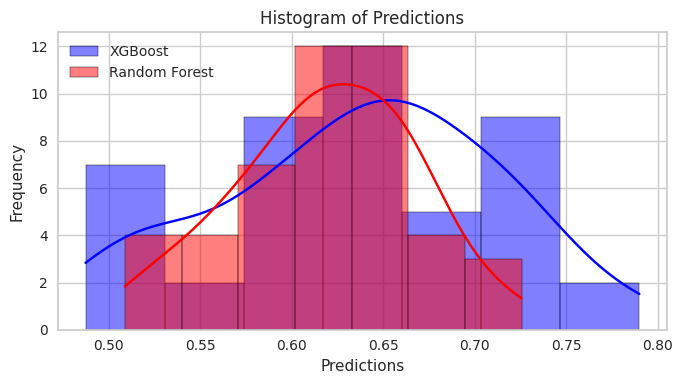

 25%|██▌       | 1/4 [00:00<00:01,  2.12it/s]

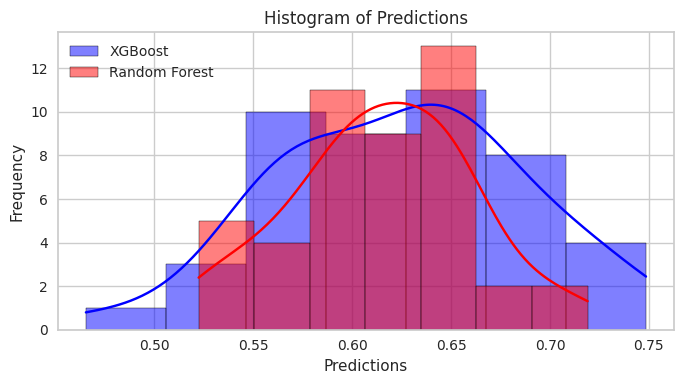

 50%|█████     | 2/4 [00:01<00:01,  1.93it/s]

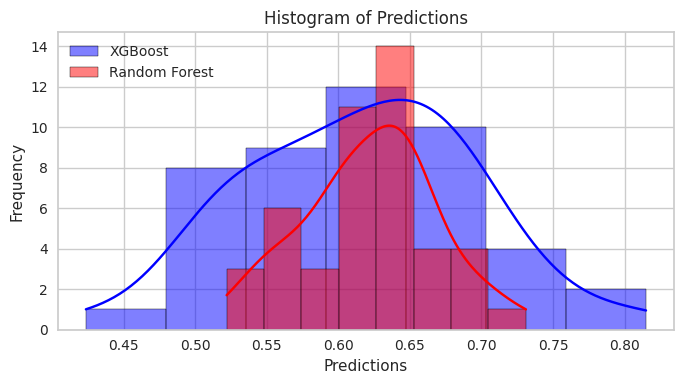

 75%|███████▌  | 3/4 [00:01<00:00,  1.97it/s]

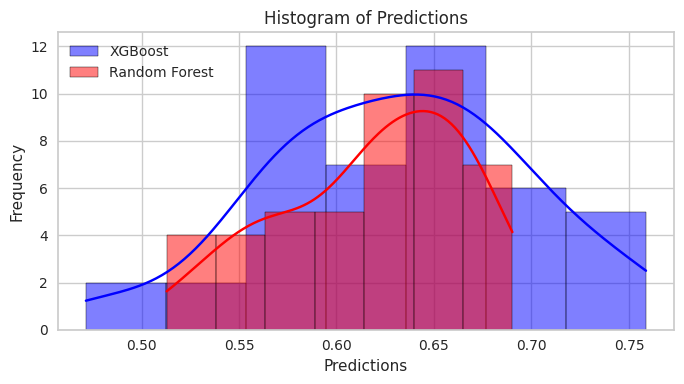

100%|██████████| 4/4 [00:01<00:00,  2.06it/s]


In [57]:
X = combined_X.iloc[:, 4:]
for i in tqdm(range(4)):
    result_df = meta.copy()
    result_df['pred_xg'] = None
    result_df['pred_rf'] = None
    os.makedirs(f'./submission/concatenated/test/results/fold_{i+1}', exist_ok=True)
    # Load Model
    xg_model = pkl.load(open(f'./submission/concatenated/combined/results/fold_{i+1}/model_xg.pkl', 'rb'))
    rf_model = pkl.load(open(f'./submission/concatenated/combined/results/fold_{i+1}/model_rf.pkl', 'rb'))

    # Predict
    xg_pred = xg_model.predict(X)
    rf_pred = rf_model.predict(X)

    result_df['pred_xg'] = xg_pred
    result_df['pred_rf'] = rf_pred

    result_df.to_csv(f'./submission/concatenated/test/results/fold_{i+1}/results.csv', index=False)

    # Histogram of pred_xg and pred_rf in same plot using seaborn
    plt.figure(figsize=(7, 4))
    sns.histplot(result_df['pred_xg'], color='blue', kde=True, label='XGBoost')
    sns.histplot(result_df['pred_rf'], color='red', kde=True, label='Random Forest')
    plt.xlabel('Predictions')
    plt.ylabel('Frequency')
    plt.title('Histogram of Predictions')
    plt.legend(loc='upper left')
    plt.savefig(f'./submission/concatenated/test/results/fold_{i+1}/histogram.png')
    plt.tight_layout()
    plt.show()